<a href="https://colab.research.google.com/github/RafalDoroz/ai/blob/main/augmentacja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
# Wczytanie zbioru danych Iris
data = load_iris()
X, y = data.data, data.target

In [13]:
# Funkcja do augmentacji danych z szumem Gaussa
def augment_data(X, noise_level=0.1, num_copies=3):
    augmented_data = X.copy()
    for _ in range(num_copies):
        noise = np.random.normal(0, noise_level, X.shape)
        augmented_data = np.vstack((augmented_data, X + noise))
    return augmented_data

In [14]:
# Tworzenie powiększonego zbioru danych
X_augmented = augment_data(X)
y_augmented = np.tile(y, 4)  # Potrójne powielenie etykiet

In [15]:
# Podział na dane uczące i testowe
X_train, X_test, y_train, y_test = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42)


In [16]:
# Normalizacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Klasyfikator logistyczny bez augmentacji
clf = LogisticRegression(max_iter=200)
clf.fit(X, y)
y_pred = clf.predict(X_test)
accuracy_without_augmentation = accuracy_score(y_test[:len(X)], y_pred)

In [18]:
# Klasyfikator logistyczny z augmentacją
clf_augmented = LogisticRegression(max_iter=200)
clf_augmented.fit(X_train, y_train)
y_pred_augmented = clf_augmented.predict(X_test)
accuracy_with_augmentation = accuracy_score(y_test, y_pred_augmented)

In [19]:
# Wyniki
print("Dokładność bez augmentacji:", accuracy_without_augmentation)
print("Dokładność z augmentacją:", accuracy_with_augmentation)

Dokładność bez augmentacji: 0.26666666666666666
Dokładność z augmentacją: 0.9583333333333334


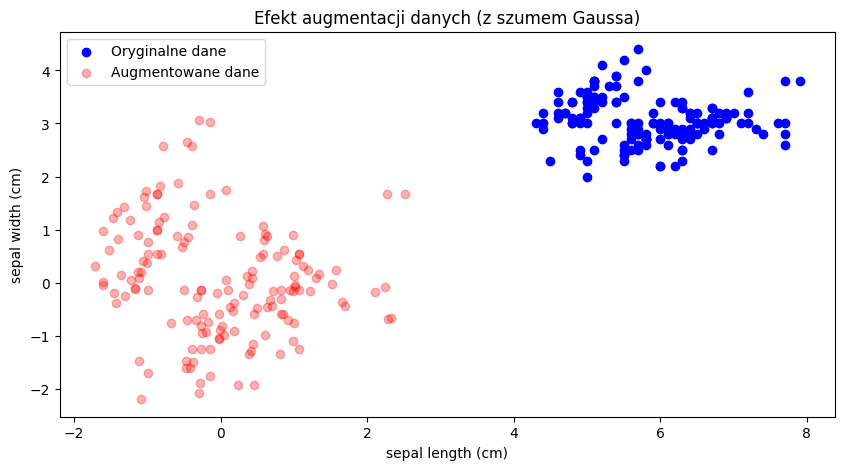

In [20]:
# Wizualizacja efektu augmentacji na pierwszych dwóch cechach
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], color="blue", label="Oryginalne dane")
plt.scatter(X_train[:len(X), 0], X_train[:len(X), 1], color="red", alpha=0.3, label="Augmentowane dane")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("Efekt augmentacji danych (z szumem Gaussa)")
plt.legend()
plt.show()